In [4]:
#importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [5]:
# Importing datatset
df = pd.read_csv('/content/Social_Network_Ads -DT,NB,SVM.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.drop(['User ID'],axis='columns',inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
# Defining the variables and splitting the data

inputs=df.drop('Purchased',axis='columns') #Independent variables
target=df.Purchased #Dependent variables

In [10]:
# creating dummies for categorical variables
dummies=pd.get_dummies(inputs.Gender)
dummies.head(3)

,Female,Male
0,0,1
1,0,1
2,1,0


In [11]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Gender,Age,EstimatedSalary,Female,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,1,0


In [12]:
# Removing Unwanted coloumns
inputs.drop(['Gender'],axis='columns',inplace=True)
inputs.head(3)

,Age,EstimatedSalary,Female,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0


In [13]:
#checking for null values
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

Exploratory Data Analysis


Dependent variable distribution --> Purchased

In [15]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)
x_train.shape, x_test.shape

((280, 4), (120, 4))

In [19]:
# Naive Bayes Classification with SKlearn
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [20]:
model.fit(x_train,y_train)

GaussianNB()

In [21]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
y_test_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [22]:
model.score(x_test,y_test)

0.9

In [23]:
x_test[0:10]

,Age,EstimatedSalary,Female,Male
370,60,46000,1,0
151,41,45000,0,1
229,42,80000,1,0
172,26,118000,1,0
373,59,130000,0,1
300,58,38000,1,0
107,27,89000,0,1
32,21,16000,1,0
262,55,125000,1,0
133,21,68000,1,0


In [24]:
y_test[0:10]

370    1
151    0
229    1
172    0
373    1
300    1
107    0
32     0
262    1
133    0
Name: Purchased, dtype: int64

In [25]:
model.predict(x_test[0:10])

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [26]:
model.predict_proba(x_test[:10])

array([[3.79673725e-02, 9.62032627e-01],
       [7.39214149e-01, 2.60785851e-01],
       [5.63247391e-01, 4.36752609e-01],
       [6.75540665e-01, 3.24459335e-01],
       [8.85248425e-04, 9.99114752e-01],
       [5.31350785e-02, 9.46864922e-01],
       [9.39755898e-01, 6.02441020e-02],
       [9.72436352e-01, 2.75636481e-02],
       [3.38310820e-03, 9.96616892e-01],
       [9.87437676e-01, 1.25623235e-02]])

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),x_train,y_train)

array([0.85714286, 0.96428571, 0.91071429, 0.94642857, 0.83928571])

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

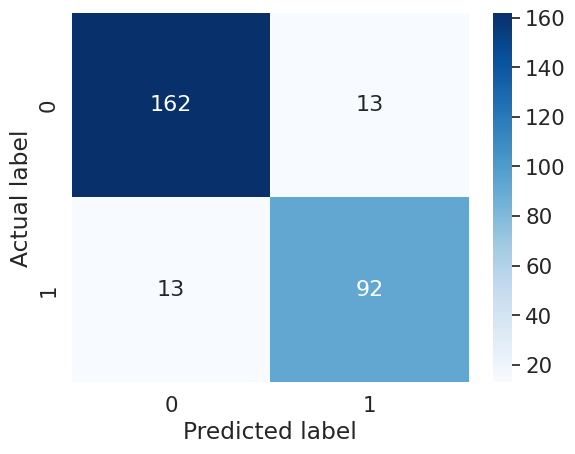

In [29]:
cm1 = confusion_matrix(y_train, y_train_pred)
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size":16}, fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
print("classification report -\n", classification_report(y_train, y_train_pred))

classification report -
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       175
           1       0.88      0.88      0.88       105

    accuracy                           0.91       280
   macro avg       0.90      0.90      0.90       280
weighted avg       0.91      0.91      0.91       280



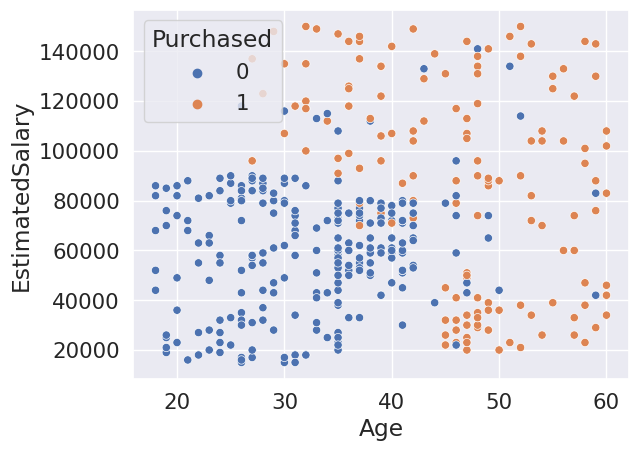

In [31]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')
plt.show()